In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot,register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller,acf,pacf#(acf=autocorrelation graph,pacf=partial autocorrelation graph)
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from scipy import stats
from scipy.special import inv_boxcox,boxcox
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
from numpy.fft import rfft,rfftfreq

C:\Users\Sujay J\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Sujay J\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\Sujay J\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("salesdaily.csv")


In [4]:
data.shape

(2106, 13)

The dataset includes 2106 observations and 13 columns.
Out of which 5 are time marks and rest 6 are variables that represent the number of sales in units for several Anatomical Therapeutic Chemical Classification (ATC)

In [5]:
data.head()

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday

So, there is perfectly rafinated data from Kaggle comprises two type of variables: float64, int64 and no one NaN/missing value.
There is strong likelihood that you never meet so clear data from the real world.

In [6]:
data.tail(20)

datum  M01AB   M01AE  N02BA  N02BE  N05B  N05C        R03   R06  \
2086  9/19/2019   7.33   3.340   3.00  33.00   5.0   2.0   3.000000  4.00   
2087  9/20/2019   5.34   3.383   2.00  51.30   3.0   0.0   1.000000  3.00   
2088  9/21/2019  10.68   5.680   1.00  44.25   3.0   0.0   6.000000  4.00   
2089  9/22/2019   3.33   3.340   1.90  56.50   3.0   0.0   8.000000  4.00   
2090  9/23/2019   5.34   4.549   3.30  55.00   6.0   0.0   1.000000  4.00   
2091  9/24/2019   2.00   1.340   6.00  61.30  12.0   0.0   1.000000  6.00   
2092  9/25/2019   6.00   3.670   4.20  32.50  14.0   1.0   1.416667  4.00   
2093  9/26/2019   5.50   3.033   2.00  31.00  13.0   0.0  31.000000  0.00   
2094  9/27/2019   4.66   4.359   4.00  41.10   4.0   0.0   2.000000  4.00   
2095  9/28/2019   7.00   1.680   4.10  48.00   6.2   0.0   1.000000  3.00   
2096  9/29/2019   3.51   3.867   3.00  67.80   6.0   0.0   3.000000  2.10   
2097  9/30/2019   2.00   1.439   2.10  49.40   9.0   0.0   5.000000  2.00   
2098  10/1/2019  11.34   2.406   0.10  47.00  15.0   4.0  17.000000  1.50   
2099  10/2/2019   5.18   3.274   2.80  30.20   9.0   1.0   0.000000  1.10   
2100  10/3/2019   5.00   3.000   4.00  40.40  10.0   0.0   2.000000  2.00   
2101  10/4/2019   7.34   5.683   2.25  22.45  13.0   0.0   1.000000  1.00   
2102  10/5/2019   3.84   5.010   6.00  25.40   7.0   0.0   0.000000  0.33   
2103  10/6/2019   4.00  11.690   2.00  34.60   6.0   0.0   5.000000  4.20   
2104  10/7/2019   7.34   4.507   3.00  50.80   6.0   0.0  10.000000  1.00   
2105  10/8/2019   0.33   1.730   0.50  44.30  20.0   2.0   2.000000  0.00   

      Year  Month  Hour Weekday Name  
2086  2019      9   276     Thursday  
2087  2019      9   276       Friday  
2088  2019      9   276     Saturday  
2089  2019      9   276       Sunday  
2090  2019      9   276       Monday  
2091  2019      9   276      Tuesday  
2092  2019      9   276    Wednesday  
2093  2019      9   276     Thursday  
2094  2019      9   276       Friday  
2095  2019      9   276     Saturday  
2096  2019      9   276       Sunday  
2097  2019      9   276       Monday  
2098  2019     10   276      Tuesday  
2099  2019     10   276    Wednesday  
2100  2019     10   276     Thursday  
2101  2019     10   276       Friday  
2102  2019     10   276     Saturday  
2103  2019     10   276       Sunday  
2104  2019     10   276       Monday  
2105  2019     10   190      Tuesday

1. M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances
2. M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives
3. N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives
4. N02BE - Other analgesics and antipyretics, Pyrazolones and Anilides
5. N05B - Psycholeptics drugs, Anxiolytic drugs
6. N05C - Psycholeptics drugs, Hypnotics and sedatives drugs
7. R03 - Drugs for obstructive airway diseases
8. R06 - Antihistamines for systemic use

In [7]:
data.describe()

M01AB        M01AE        N02BA        N02BE         N05B  \
count  2106.000000  2106.000000  2106.000000  2106.000000  2106.000000   
mean      5.033683     3.895830     3.880441    29.917095     8.853627   
std       2.737579     2.133337     2.384010    15.590966     5.605605   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     2.340000     2.000000    19.000000     5.000000   
50%       4.990000     3.670000     3.500000    26.900000     8.000000   
75%       6.670000     5.138000     5.200000    38.300000    12.000000   
max      17.340000    14.463000    16.000000   161.000000    54.833333   

              N05C          R03          R06         Year        Month  \
count  2106.000000  2106.000000  2106.000000  2106.000000  2106.000000   
mean      0.593522     5.512262     2.900198  2016.401235     6.344255   
std       1.092988     6.428736     2.415816     1.665060     3.386954   
min       0.000000     0.000000     0.000000  2014.000000     1.000000   
25%       0.000000     1.000000     1.000000  2015.000000     3.000000   
50%       0.000000     4.000000     2.000000  2016.000000     6.000000   
75%       1.000000     8.000000     4.000000  2018.000000     9.000000   
max       9.000000    45.000000    15.000000  2019.000000    12.000000   

              Hour  
count  2106.000000  
mean    275.945869  
std       1.970547  
min     190.000000  
25%     276.000000  
50%     276.000000  
75%     276.000000  
max     276.000000

You can see that median and mean values (50%) are close to each other which means no many outliers. Otherwise, there are exist, to see that look at the range between 75th %tile and max values.
  
  Let's figure it out how many outliers we have and where they are.

In [8]:
columns = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']


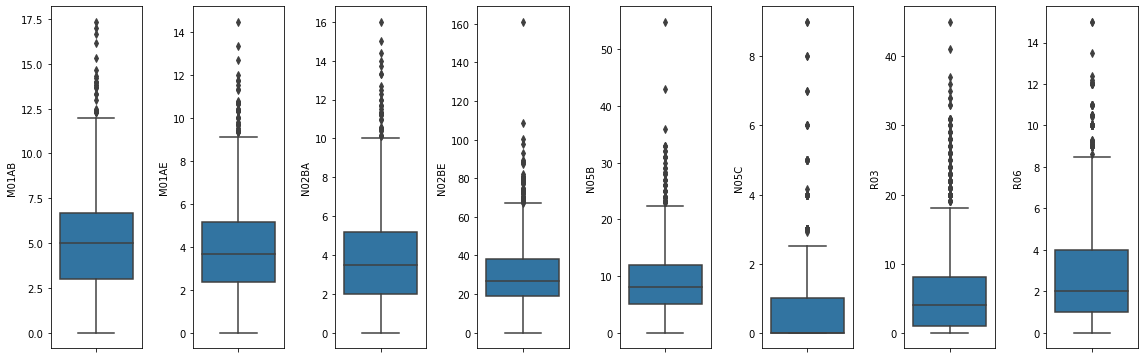

In [9]:
number_of_columns = len(columns)
plt.figure(figsize=(2*number_of_columns,10))
for category in range(0, number_of_columns):
    plt.subplot(2,number_of_columns,category+1)
    sns.boxplot(data[columns[category]],orient='v')
    plt.tight_layout()

Look at that! All of them includes outliers.
In accordance with statistical terms, outliers are defined as how values those out of 3 IQR.

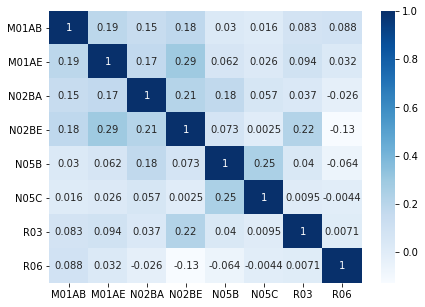

In [10]:
corr = data[columns].corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,
           annot=True,cmap='Blues');

As part of exploratory data analysis sometimes incredibly useful to look at correlation matrix to future models tuning or further data exploration.
On the graph above dark shades represents positive correlation while lighter shades negative. If you, for instance, would like to use linear regression, you have to consider removing correlated variables to improve forecast accuracy.
In our case, we can see a weak correlation between related categories (N05B, N05C, and N02BA, N02BE) and an interesting association between M01AE, N02BA codes. Defining the reasons for that could be the goal of further analysis.

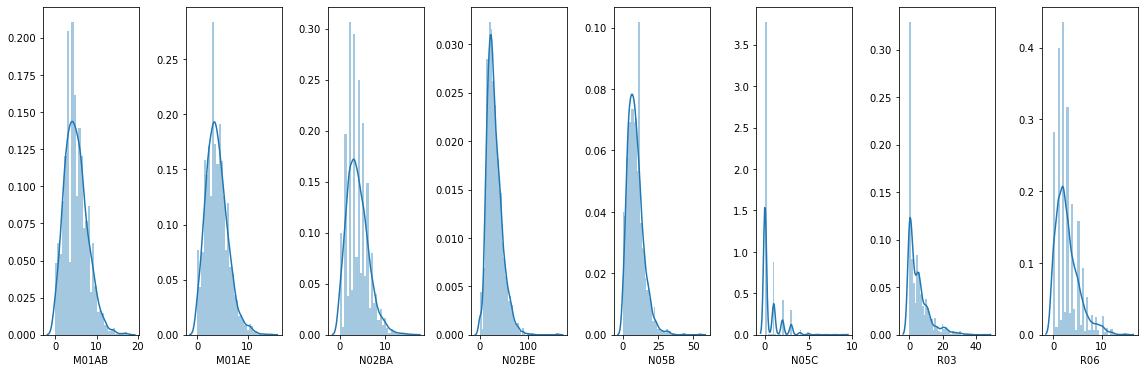

In [11]:
plt.figure(figsize=(2*number_of_columns,10))
for category in range(0,number_of_columns):
    plt.subplot(2 ,number_of_columns ,category+1)
    sns.distplot(data[columns[category]], kde=True)
    plt.tight_layout()

Here we see how data is distributed and what are most popular values for each independent categories.
Also, we can see M01AB and M01AE seems like normally distributed. In the same time remaining codes are left skewed.

In [12]:
atc_codes = {'Antirheumatic' : ['M01AB','M01AE'],
             'Analgesics' : ['N02BA','N02BE'],
             'Psycholeptics' : ['N05C','N05B'],
             'Airway diseases': ['R03'],
             'Antihistamines': ['R06']}

In [13]:
data['datum'] = pd.to_datetime(data['datum'])
data = data.set_index('datum')

In [14]:
def creat_charts(df,markets,title,index,freq,DF=None):
    fig,ax = plt.subplots(1,1,sharex=True,figsize = (15,5))
    for codes in markets:
        ax.set_title('{} market'.format(title))
        index = df[codes].resample(freq).sum().index
        plt.plot(index,df[codes].resample(freq).sum())
        register_matplotlib_converters()
        plt.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


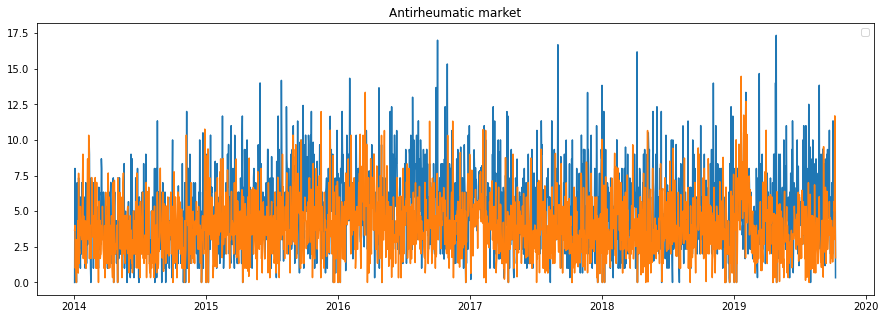

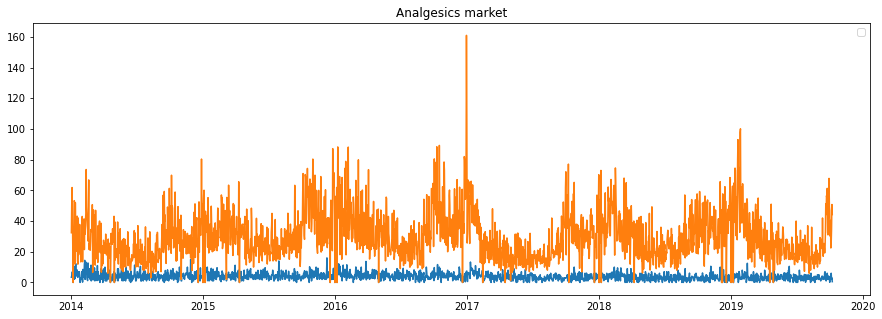

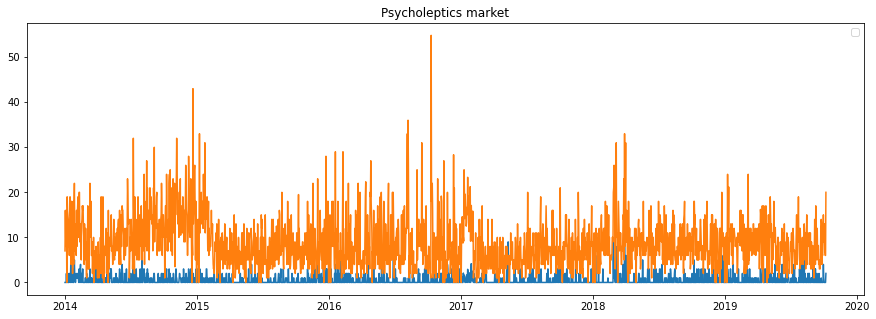

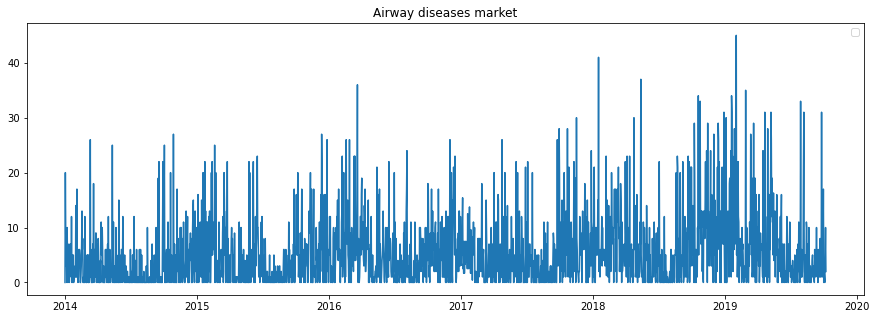

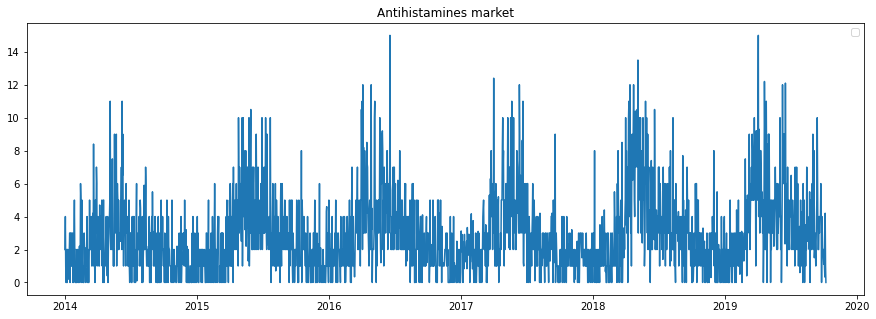

In [15]:
for market in atc_codes.items():
    creat_charts(data,market[1],market[0],data.index,'D',DF=True)

Easy to see a clear seasonality of sales of antihistamines and analgesics products.
Also, on first sight, data looks quite stationary.
Let's determine is a time series is stationary or not by applying the Dickey-Fuller test

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


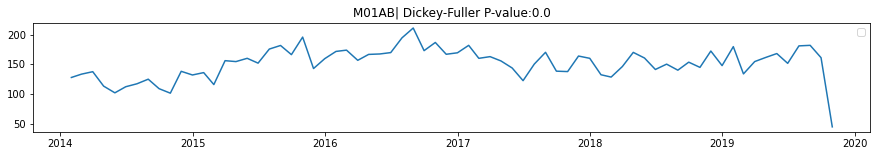

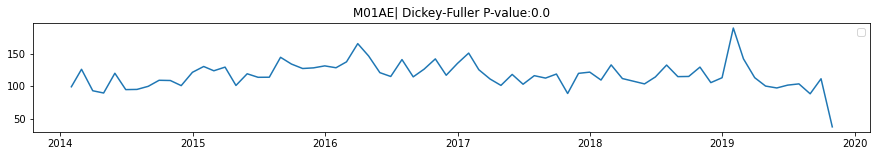

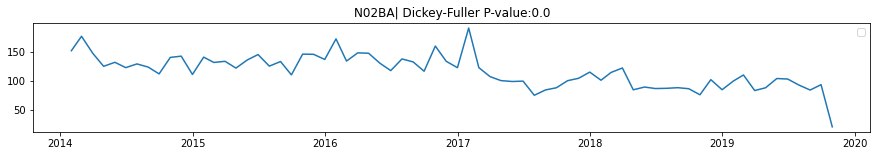

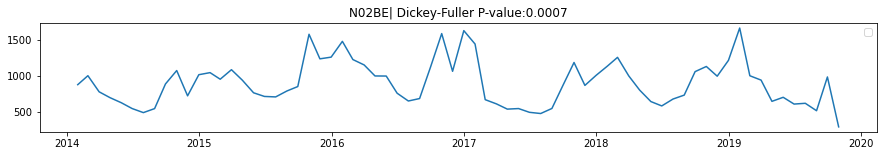

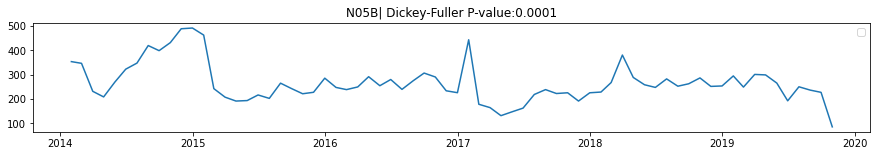

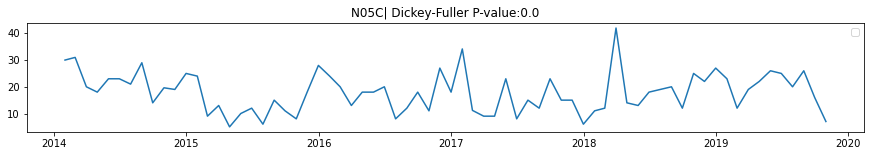

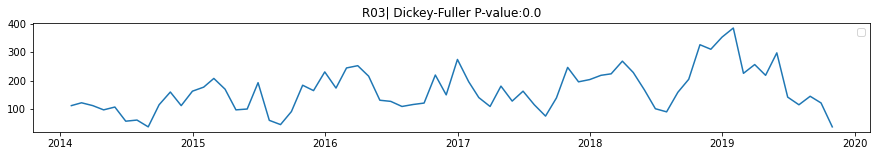

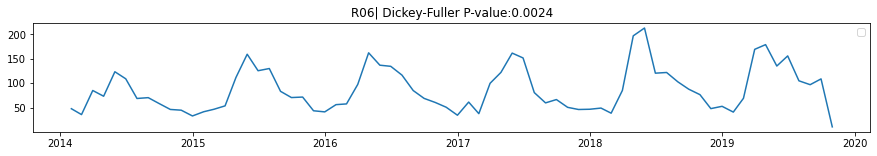

In [16]:
for code in columns:
    fig,ax = plt.subplots(1,1,sharex=True,figsize = (15,2))
    ax.set_title('{}| Dickey-Fuller P-value:{}'.format(code,round(adfuller(data[code])[1],4)))
    index = data[code].resample('M').sum().index
    plt.plot(index,data[code].resample('M').sum())
    register_matplotlib_converters()
    plt.legend()

How you can see we have changed a frequency of the data from daily to monthly
That made data is much more readable and we can see that all of the markets except one have a seasonality
At the same time, you can see how increased the number of sales during the 2015 year on psycholeptics market and sharply declined then
Sales of the airway disease market except seasonality includes an improving trend
By the way, you may have noticed in the title of the values of the chart of the p-value of the Dickey-Fuller test:

* when p-value > 0.05, and the data is not stationary.
* otherwise, p-value <= 0.05, the null hypothesis is rejected, and the process is considered to be stationary.
* 

In [17]:
def DF_test(df):
    'prints the dickey-fuller test'
    statistics = adfuller(df)
    print('DF Statistics:{}'.format(round(statistics[0],2)))
    print('P-value:{}.'.format(round(statistics[1],4)))
    print('critical Values :')
    for key,value in statistics[4].items():
        print('\t{}:{}'.format(key,round(value),2))

In [18]:
DF_test(data['R06'])#check for each column

DF Statistics:-3.85
P-value:0.0024.
critical Values :
	1%:-3
	5%:-3
	10%:-3


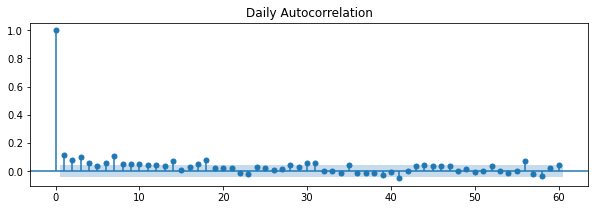

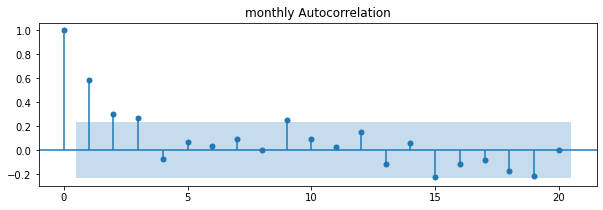

In [19]:
fig, ax1 = plt.subplots(figsize=(10, 3))
fig, ax2 = plt.subplots(figsize=(10, 3))
daily_autocorr = plot_pacf(data['N02BA'],lags=60,title='Daily Autocorrelation',ax=ax1)
monthly_autocorr = plot_pacf(data['N02BA'].resample('M').sum(),lags=20,title='monthly Autocorrelation',ax=ax2)

the first drop is the p value in the pacf plot =p= 1
  the exponential drop in acf plot = q =1
  D =1


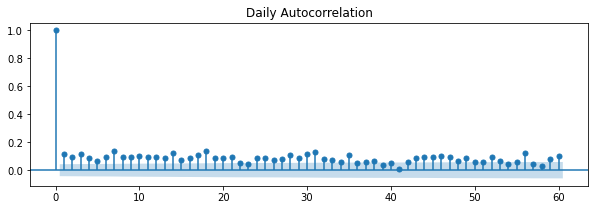

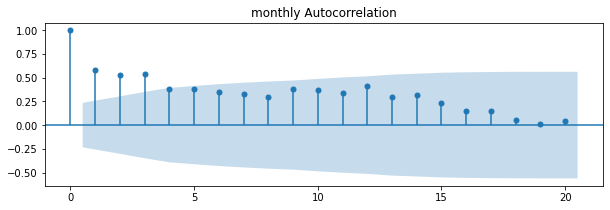

In [20]:
fig, ax1 = plt.subplots(figsize=(10, 3))
fig, ax2 = plt.subplots(figsize=(10, 3))
daily_autocorr = plot_acf(data['N02BA'],lags=60,title='Daily Autocorrelation',ax=ax1)
monthly_autocorr = plot_acf(data['N02BA'].resample('M').sum(),lags=20,title='monthly Autocorrelation',ax=ax2)


To demonstrate how works the .plot_pacf function we took data with seasonality.
If autocorrelation values are close to 0, it is mean that values between lagged observations are not correlated with one another. At the same time, partial autocorrelations with values close to 1 or -1 demonstrate that there exist strong positive or negative correlations between the lagged observations of the time series.
The blue shaded regions indicate borders of the confidence intervals. If partial autocorrelation values are beyond this confidence interval regions, then you can assume that the observed partial autocorrelation values are statistically significant.

Pay your attention that daily values highly correlated with nearest observations, otherwise on the monthly chart you can notice a significant correlation with the same month last year.

In [21]:
freq = rfftfreq(len(data['R03'].resample('M').sum()), d = 1/12 )
rffabs = abs(rfft(data['R03'].resample('M').sum()))

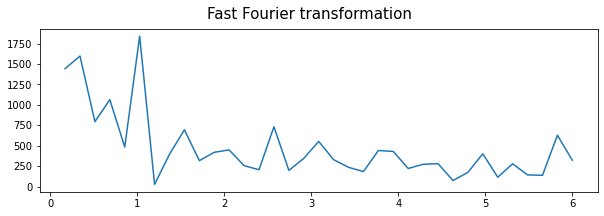

In [22]:
fig = plt.figure(figsize = (10,3))
fig.suptitle('Fast Fourier transformation', fontsize=15)
plt.plot(freq[1:], rffabs[1:]);

In [23]:
df=data[atc_codes['Analgesics']].copy()
df=df.set_index(data.index)

In [24]:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2106 entries, 2014-01-02 to 2019-10-08
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N02BA   2106 non-null   float64
 1   N02BE   2106 non-null   float64
dtypes: float64(2)
memory usage: 49.4 KB


In [25]:

df['volume_sales'] = df['N02BA'] + df['N02BE']
df = df.drop(columns=['N02BA', 'N02BE'])

In [26]:
#split data for 2 independent groups. The first one we will use to training models and second one as test
train_data = df['01/01/2017':'04/30/2019'].copy()
test_data = df['05/1/2019':].copy()

In [27]:
train_data.head(10)

volume_sales
datum                   
2017-01-01     27.237500
2017-01-02     32.625000
2017-01-03     71.437500
2017-01-04     63.183333
2017-01-05     67.416667
2017-01-06     71.187500
2017-01-07     40.583333
2017-01-08     30.458333
2017-01-09     58.708333
2017-01-10     67.541667

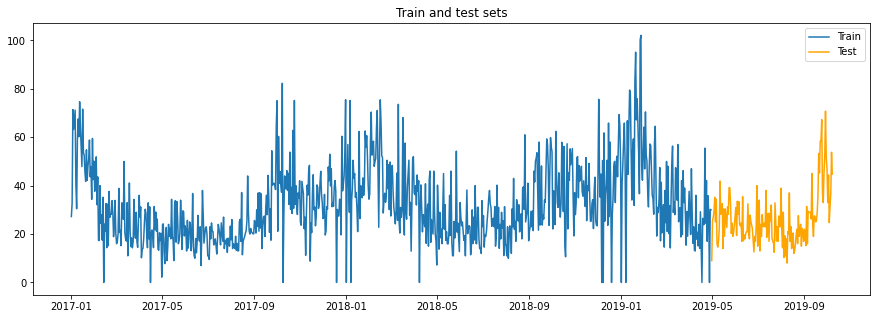

In [28]:
plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['volume_sales'], label='Train')
plt.plot(test_data.index, test_data['volume_sales'], color='orange', label='Test')
plt.legend()
plt.title('Train and test sets')
register_matplotlib_converters()
plt.show()

Below we have to create some functions to generate features that we will use as predictors inside our's models.
Pay your attention there are functions which return dummy features for daytime values and one to standardize has made figures

#### Initial preprocessing and feature generationÂ¶



In [45]:
df.shape

(2106, 4)

In [29]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [30]:
adfuller_test(df['volume_sales'])

ADF Test Statistic : -4.173723622762982
p-value : 0.0007297307599621944
#Lags Used : 13
Number of Observations Used : 2092
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [31]:
df['Sales First Difference'] = df['volume_sales'] - df['volume_sales'].shift(1)
df['Seasonal First Difference']=df['volume_sales']-df['volume_sales'].shift(12)


In [32]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -9.130586806603484
p-value : 3.0296698163229913e-15
#Lags Used : 25
Number of Observations Used : 2068
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='datum'>

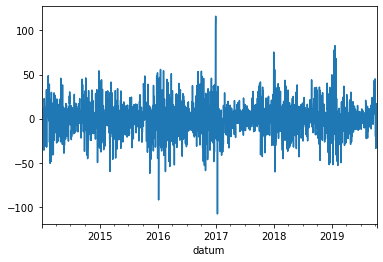

In [33]:
df['Seasonal First Difference'].plot()

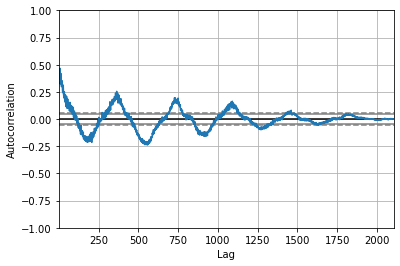

In [34]:
#from pd.tools.plotting import autocorrelation_plot
autocorrelation_plot(df['volume_sales'])
plt.show()

In [35]:
model = ARIMA(df['volume_sales'],order=(1,1,1))

In [38]:
model_fit = model.fit()

In [39]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.volume_sales   No. Observations:                 2105
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8426.969
Method:                       css-mle   S.D. of innovations             13.250
Date:                Sat, 02 Jan 2021   AIC                          16861.938
Time:                        12:55:15   BIC                          16884.546
Sample:                    01-03-2014   HQIC                         16870.217
                         - 10-08-2019                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0011      0.036      0.032      0.975      -0.069       0.071
ar.L1.D.volume_sales     0.0462      0.024      1.891      0.059      -0.002       0.094
ma.L1.D.volume_sales    -0.8822      0.011    -82.555      0.000      -0.903      -0.861
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           21.6415           +0.0000j           21.6415            0.0000
MA.1            1.1335           +0.0000j            1.1335            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='datum'>

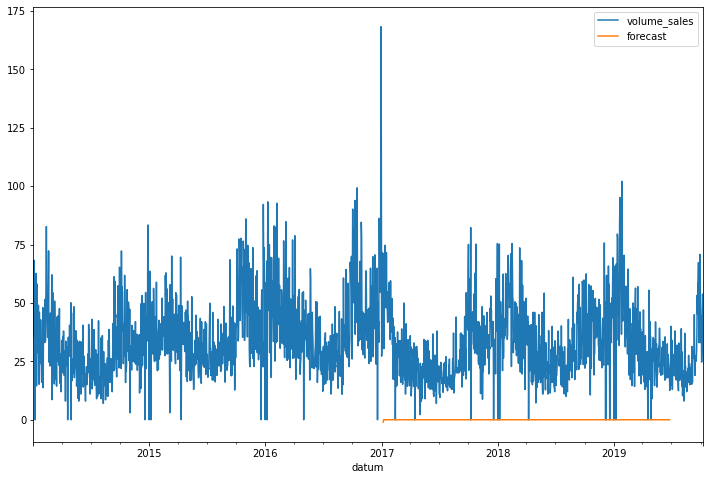

In [44]:
df['forecast']=model_fit.predict(start=1100,end=2000,dynamic=True)
df[['volume_sales','forecast']].plot(figsize=(12,8))

In [46]:
model=sm.tsa.statespace.SARIMAX(df['volume_sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<AxesSubplot:xlabel='datum'>

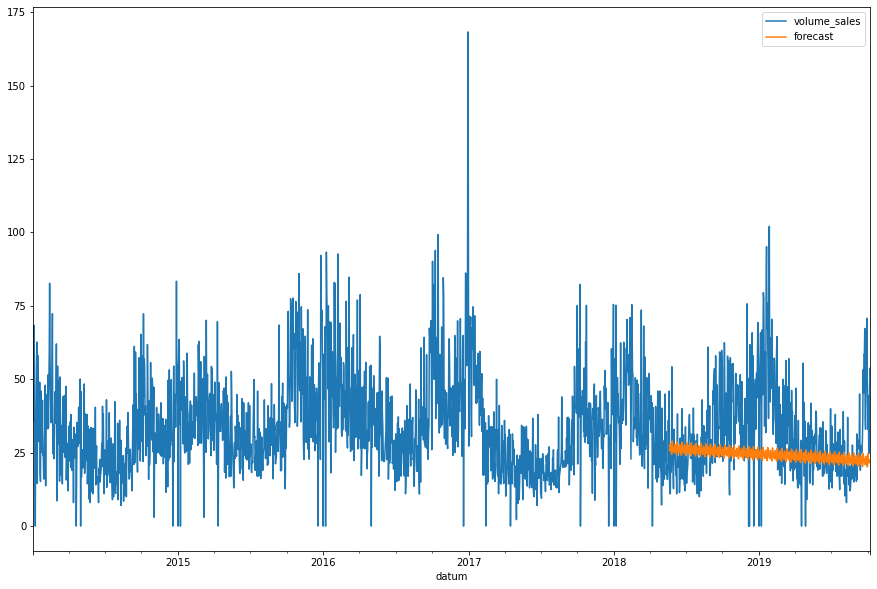

In [63]:
df['forecast']=results.predict(start=1600,end=2103,dynamic=True)
df[['volume_sales','forecast']].plot(figsize=(15,10))


In [77]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,120)]

In [78]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [79]:
future_datest_df.tail()

volume_sales Sales First Difference Seasonal First Difference  \
2029-05-08          NaN                    NaN                       NaN   
2029-06-08          NaN                    NaN                       NaN   
2029-07-08          NaN                    NaN                       NaN   
2029-08-08          NaN                    NaN                       NaN   
2029-09-08          NaN                    NaN                       NaN   

           forecast  
2029-05-08      NaN  
2029-06-08      NaN  
2029-07-08      NaN  
2029-08-08      NaN  
2029-09-08      NaN

In [80]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

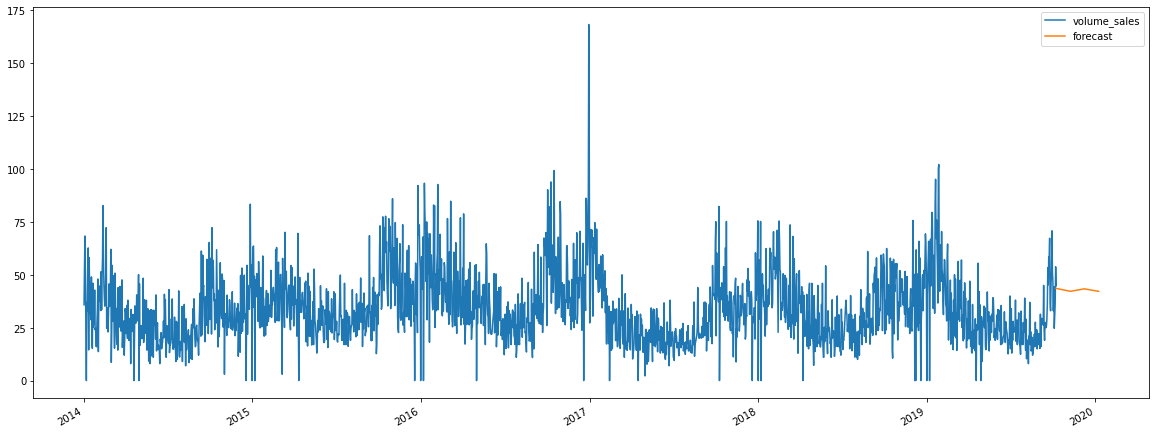

In [82]:
future_df['forecast'] = results.predict(start = 2105, end = 2225, dynamic= True)  
future_df[['volume_sales', 'forecast']].plot(figsize=(20, 8)) 